In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/PROYECTO FINAL DIPLOMADO/AI On-Campus Research Survey (Responses).xlsx")
df.head()

,Timestamp,"On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?","On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?","On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?","On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?",Do you know what Chat-GPT is?,What college are you in?
0,2023-03-31 19:59:11.443,5,5,5,5,Yes,"Science, Engineering, & Technology"
1,2023-03-31 19:59:44.970,4,3,4,4,Yes,"Science, Engineering, & Technology"
2,2023-03-31 20:06:24.653,3,3,5,1,No,Business
3,2023-03-31 20:10:54.939,4,3,5,2,Yes,Business
4,2023-03-31 20:14:34.488,5,2,1,5,Yes,Humanities & Social Sciences


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 7 columns):
 #   Column                                                                                                        Non-Null Count  Dtype         
---  ------                                                                                                        --------------  -----         
 0   Timestamp                                                                                                     258 non-null    datetime64[ns]
 1   On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?  258 non-null    int64         
 2   On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?                   258 non-null    int64         
 3   On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?           258 non-null    int64         
 4   On a scale from

LIMPIEZA DE DATOS

In [ ]:
# elimina la columna'Timestamp'
df = df.drop('Timestamp', axis=1)

In [ ]:
# Cambia el nombre de las columnas 1-5 a Q1-Q5
df = df.rename(columns={
    'On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?': 'Q1',
    'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?': 'Q2',
    'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?': 'Q3',
    'On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?': 'Q4',
    'Do you know what Chat-GPT is?': 'Q5',
    'What college are you in?': 'Target'
})

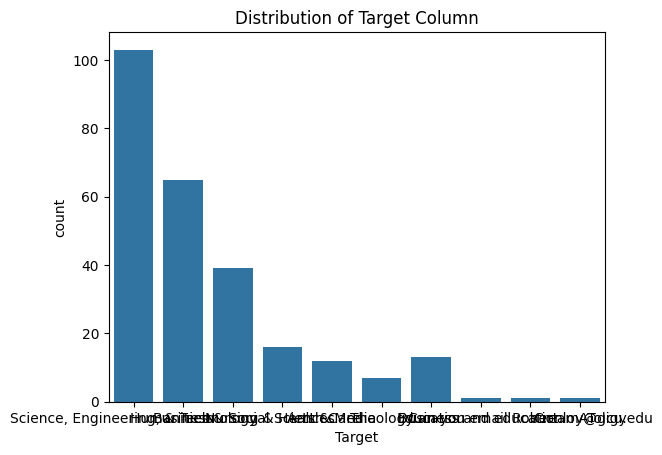

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Column')
plt.show()

In [ ]:
unique_values = df['Target'].unique()
print("Unique values in the 'Target' column:", unique_values)

Unique values in the 'Target' column: ['Science, Engineering, & Technology' 'Business'
 'Humanities & Social Sciences' 'Nursing & Health Care' 'Arts & Media'
 'Theology' 'Education' 'Business and education'
 'Can you email Robert.loy@gcu.edu' 'CreamAToligy']


In [ ]:
# Eliminar filas con valores de 'Objetivo' no válidos especificados
invalid_values = ['CreamAToligy', 'Can you email Robert.loy@gcu.edu']
df = df[~df['Target'].isin(invalid_values)]

# Verifique los valores únicos nuevamente para confirmar
unique_values = df['Target'].unique()
print("Unique values in the 'Target' column after cleaning:", unique_values)

Unique values in the 'Target' column after cleaning: ['Science, Engineering, & Technology' 'Business'
 'Humanities & Social Sciences' 'Nursing & Health Care' 'Arts & Media'
 'Theology' 'Education' 'Business and education']


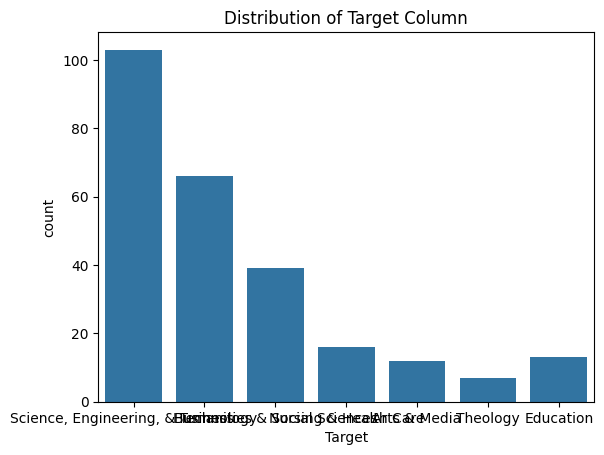

In [ ]:
#Resultado despues del ajuste

sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Column')
plt.show()

In [ ]:
target_counts = df['Target'].value_counts()

print("Total count for each unique value in the 'Target' column:")
print(target_counts)

Total count for each unique value in the 'Target' column:
Target
Science, Engineering, & Technology    103
Business                               65
Humanities & Social Sciences           39
Nursing & Health Care                  16
Education                              13
Arts & Media                           12
Theology                                7
Business and education                  1
Name: count, dtype: int64


In [ ]:
# Combine 'Negocios y educación' con 'Negocios'
df['Target'] = df['Target'].replace('Business and education', 'Business')

# Verifique los valores únicos y sus recuentos nuevamente
target_counts = df['Target'].value_counts()
print("Total count for each unique value in the 'Target' column after combining 'Business and education':")
print(target_counts)

Total count for each unique value in the 'Target' column after combining 'Business and education':
Target
Science, Engineering, & Technology    103
Business                               66
Humanities & Social Sciences           39
Nursing & Health Care                  16
Education                              13
Arts & Media                           12
Theology                                7
Name: count, dtype: int64


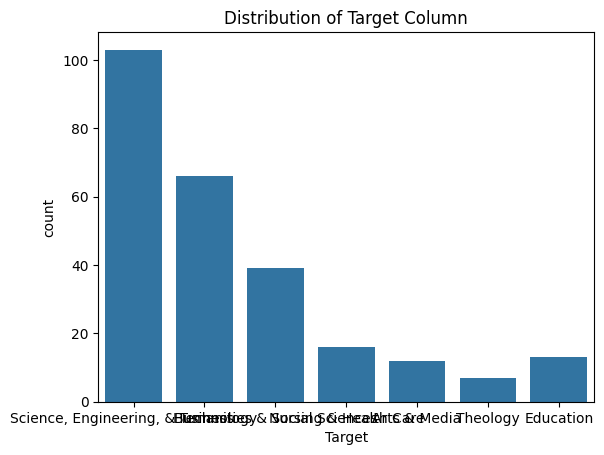

In [ ]:
#Resultado despues del ajuste

sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Column')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Codificar la variable de destino
label_encoder = LabelEncoder()
df['Target_encoded'] = label_encoder.fit_transform(df['Target'])

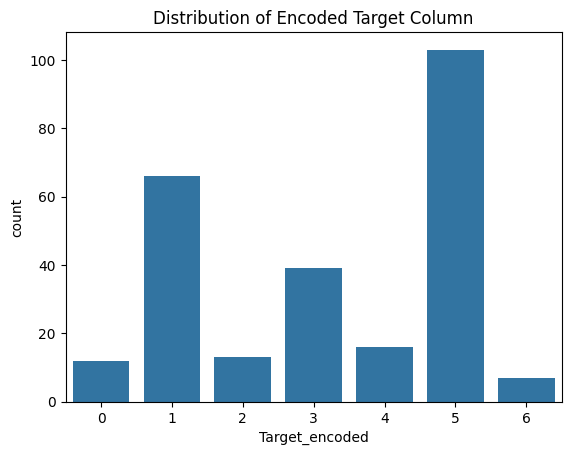

In [ ]:
# Visualice la distribución de la variable de destino codificada.
sns.countplot(x='Target_encoded', data=df)
plt.title('Distribution of Encoded Target Column')
plt.show()

In [ ]:
# Convierta 'Q5' a valores binarios (1 para 'Sí', 0 para 'No')
df['Q5'] = df['Q5'].map({'Yes': 1, 'No': 0})

In [ ]:
#comprobar los datos después del preprocesamiento
df.head()

,Q1,Q2,Q3,Q4,Q5,Target,Target_encoded
0,5,5,5,5,1,"Science, Engineering, & Technology",5
1,4,3,4,4,1,"Science, Engineering, & Technology",5
2,3,3,5,1,0,Business,1
3,4,3,5,2,1,Business,1
4,5,2,1,5,1,Humanities & Social Sciences,3


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler


# Definir características (X) y variable objetivo (y)
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
y = df['Target_encoded']

# Divida el conjunto de datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

RANDOM FOREST

In [ ]:
# inicializamos oversampler
oversampler = RandomOverSampler(random_state=42)

# Aplicamos oversampling solo a clases minoritarias
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
# Definir los parametros de la cuadrilla
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializamos Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Inicializamos GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Ajustar la búsqueda de cuadrícula a los datos.
grid_search.fit(X_resampled, y_resampled)

# Obtenga los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# predicciones en el conjunto de prueba utilizando el mejor modelo.
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluar el mejor modelo
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print("Best Parameters:", best_params)
print(f"Accuracy with Best Model: {accuracy}")
print(f"Classification Report:\n{classification_report_result}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy with Best Model: 0.2265625
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.37      0.17      0.24        40
           2       0.00      0.00      0.00         9
           3       0.15      0.11      0.12        19
           4       0.10      0.12      0.11         8
           5       0.41      0.39      0.40        46
           6       0.04      0.50      0.07         2

    accuracy                           0.23       128
   macro avg       0.15      0.19      0.13       128
weighted avg       0.29      0.23      0.24       128



ARBOL DE DECISION

In [ ]:
# Define features (X) and target variable (y)
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
y = df['Target_encoded']

# Divida el conjunto de datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrena el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# evaluacion del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.2597402597402597

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.31      0.24      0.27        21
           2       0.00      0.00      0.00         7
           3       0.12      0.15      0.13        13
           4       0.00      0.00      0.00         4
           5       0.43      0.45      0.44        29
           6       0.00      0.00      0.00         1

    accuracy                           0.26        77
   macro avg       0.12      0.12      0.12        77
weighted avg       0.27      0.26      0.26        77


Confusion Matrix:
 [[ 0  0  0  1  0  1  0]
 [ 1  5  4  5  2  4  0]
 [ 1  1  0  3  0  2  0]
 [ 3  0  0  2  0  8  0]
 [ 1  0  1  0  0  2  0]
 [ 1  9  0  6  0 13  0]
 [ 0  1  0  0  0  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MAQUINA DE SOPORTE VECTORIAL

In [ ]:
# Define features (X) and target variable (y)
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
y = df['Target_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador SVM
svm_classifier = SVC()

# Entrenar el clasificador SVM
svm_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir el informe de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.3269230769230769

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.12      0.19        17
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         2
           5       0.31      0.94      0.47        16
           6       0.00      0.00      0.00         1

    accuracy                           0.33        52
   macro avg       0.12      0.15      0.09        52
weighted avg       0.26      0.33      0.21        52



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Redes Neuronales Convolucionales

In [ ]:
# Definir características (X) y variable objetivo (y)
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
y = df['Target_encoded']

# Divida el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construye la red neuronal
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Hacer predicciones
y_pred = np.round(model.predict(X_test))

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Epoch 1/50
21/21 [==============================] - 1s 3ms/step - loss: -0.4780 - accuracy: 0.1961
Epoch 2/50
21/21 [==============================] - 0s 2ms/step - loss: -0.9804 - accuracy: 0.2402
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: -1.5055 - accuracy: 0.2402
Epoch 4/50
21/21 [==============================] - 0s 2ms/step - loss: -2.0970 - accuracy: 0.2402
Epoch 5/50
21/21 [==============================] - 0s 2ms/step - loss: -2.7287 - accuracy: 0.2402
Epoch 6/50
21/21 [==============================] - 0s 2ms/step - loss: -3.4733 - accuracy: 0.2402
Epoch 7/50
21/21 [==============================] - 0s 2ms/step - loss: -4.2972 - accuracy: 0.2402
Epoch 8/50
21/21 [==============================] - 0s 2ms/step - loss: -5.2607 - accuracy: 0.2402
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: -6.3599 - accuracy: 0.2402
Epoch 10/50
21/21 [==============================] - 0s 2ms/step - loss: -7.5848 - accuracy: 0.2402
Epoch 11/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Nearest Neighbors (KNN)

In [ ]:

# Definir características (X) y variable objetivo (y)
X = df[['Q1', 'Q2', 'Q3', 'Q4', 'Q5']]
y = df['Target_encoded']

# Divida el conjunto de datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Entrena el clasificador KNN
knn_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Evaluar el clasificador KNN
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir el informe de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.25

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.27      0.24      0.25        17
           2       0.11      0.25      0.15         4
           3       0.33      0.10      0.15        10
           4       0.00      0.00      0.00         2
           5       0.37      0.44      0.40        16
           6       0.00      0.00      0.00         1

    accuracy                           0.25        52
   macro avg       0.15      0.15      0.14        52
weighted avg       0.27      0.25      0.25        52



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
